## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.
D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (type, 1) or '1type' as

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.8

In [8]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

50000/50000 [==============================] - 12s 241us/step - loss: 0.8152 - accuracy: 0.7047 - val_loss: 1.7327 - val_accuracy: 0.5033
Epoch 49/50
50000/50000 [==============================] - 12s 238us/step - loss: 0.8218 - accuracy: 0.7001 - val_loss: 1.7411 - val_accuracy: 0.4943
Epoch 50/50
50000/50000 [==============================] - 10s 205us/step - loss: 0.8079 - accuracy: 0.7070 - val_loss: 1.7632 - val_accuracy: 0.4902
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_____________________________________________________

50000/50000 [==============================] - 12s 232us/step - loss: 0.7616 - accuracy: 0.7325 - val_loss: 1.4450 - val_accuracy: 0.5263
Epoch 46/50
50000/50000 [==============================] - 12s 230us/step - loss: 0.7569 - accuracy: 0.7332 - val_loss: 1.4412 - val_accuracy: 0.5388
Epoch 47/50
50000/50000 [==============================] - 12s 239us/step - loss: 0.7390 - accuracy: 0.7397 - val_loss: 1.4518 - val_accuracy: 0.5443
Epoch 48/50
50000/50000 [==============================] - 12s 235us/step - loss: 0.7270 - accuracy: 0.7435 - val_loss: 1.5674 - val_accuracy: 0.5163
Epoch 49/50
50000/50000 [==============================] - 12s 244us/step - loss: 0.7121 - accuracy: 0.7486 - val_loss: 1.5288 - val_accuracy: 0.5297
Epoch 50/50
50000/50000 [==============================] - 12s 242us/step - loss: 0.6873 - accuracy: 0.7568 - val_loss: 1.5697 - val_accuracy: 0.5283
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________

50000/50000 [==============================] - 5s 109us/step - loss: 1.3993 - accuracy: 0.5080 - val_loss: 1.4487 - val_accuracy: 0.4876
Epoch 43/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.3936 - accuracy: 0.5107 - val_loss: 1.4471 - val_accuracy: 0.4891
Epoch 44/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.3862 - accuracy: 0.5149 - val_loss: 1.4470 - val_accuracy: 0.4829
Epoch 45/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.3815 - accuracy: 0.5148 - val_loss: 1.4442 - val_accuracy: 0.4897
Epoch 46/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.3747 - accuracy: 0.5177 - val_loss: 1.4383 - val_accuracy: 0.4941
Epoch 47/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.3684 - accuracy: 0.5202 - val_loss: 1.4276 - val_accuracy: 0.4976
Epoch 48/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.3624 - accuracy: 0.5214 - val_loss:

Epoch 40/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.8410 - accuracy: 0.3571 - val_loss: 1.8423 - val_accuracy: 0.3568
Epoch 41/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.8375 - accuracy: 0.3596 - val_loss: 1.8388 - val_accuracy: 0.3581
Epoch 42/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.8340 - accuracy: 0.3597 - val_loss: 1.8361 - val_accuracy: 0.3572
Epoch 43/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.8306 - accuracy: 0.3613 - val_loss: 1.8325 - val_accuracy: 0.3580
Epoch 44/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.8272 - accuracy: 0.3621 - val_loss: 1.8288 - val_accuracy: 0.3611
Epoch 45/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.8240 - accuracy: 0.3630 - val_loss: 1.8256 - val_accuracy: 0.3624
Epoch 46/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.8207 - accuracy: 0.3643

50000/50000 [==============================] - 6s 127us/step - loss: 2.1756 - accuracy: 0.2193 - val_loss: 2.1703 - val_accuracy: 0.2246
Epoch 38/50
50000/50000 [==============================] - 6s 117us/step - loss: 2.1731 - accuracy: 0.2199 - val_loss: 2.1678 - val_accuracy: 0.2261
Epoch 39/50
50000/50000 [==============================] - 5s 110us/step - loss: 2.1707 - accuracy: 0.2212 - val_loss: 2.1654 - val_accuracy: 0.2267
Epoch 40/50
50000/50000 [==============================] - 5s 106us/step - loss: 2.1683 - accuracy: 0.2220 - val_loss: 2.1631 - val_accuracy: 0.2280
Epoch 41/50
50000/50000 [==============================] - 6s 122us/step - loss: 2.1660 - accuracy: 0.2231 - val_loss: 2.1607 - val_accuracy: 0.2299
Epoch 42/50
50000/50000 [==============================] - 6s 110us/step - loss: 2.1636 - accuracy: 0.2241 - val_loss: 2.1584 - val_accuracy: 0.2306
Epoch 43/50
50000/50000 [==============================] - 6s 115us/step - loss: 2.1614 - accuracy: 0.2251 - val_loss:

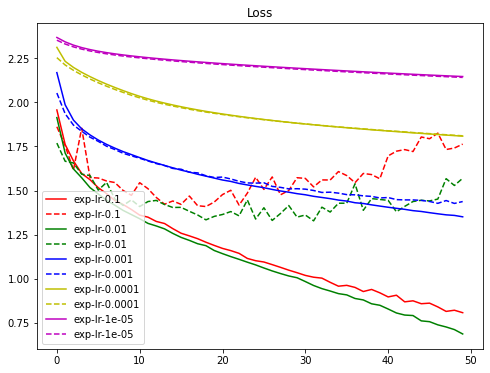

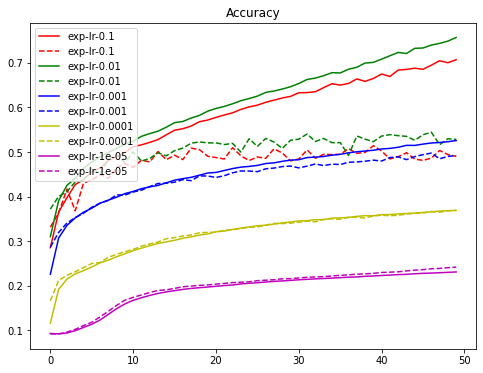

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()